### Chapter 3 Analysis for Linear Demand 

- We will update Demend, Surplus and No-purchase Fairness.
- Figure 1 shows the values presented in the paper.

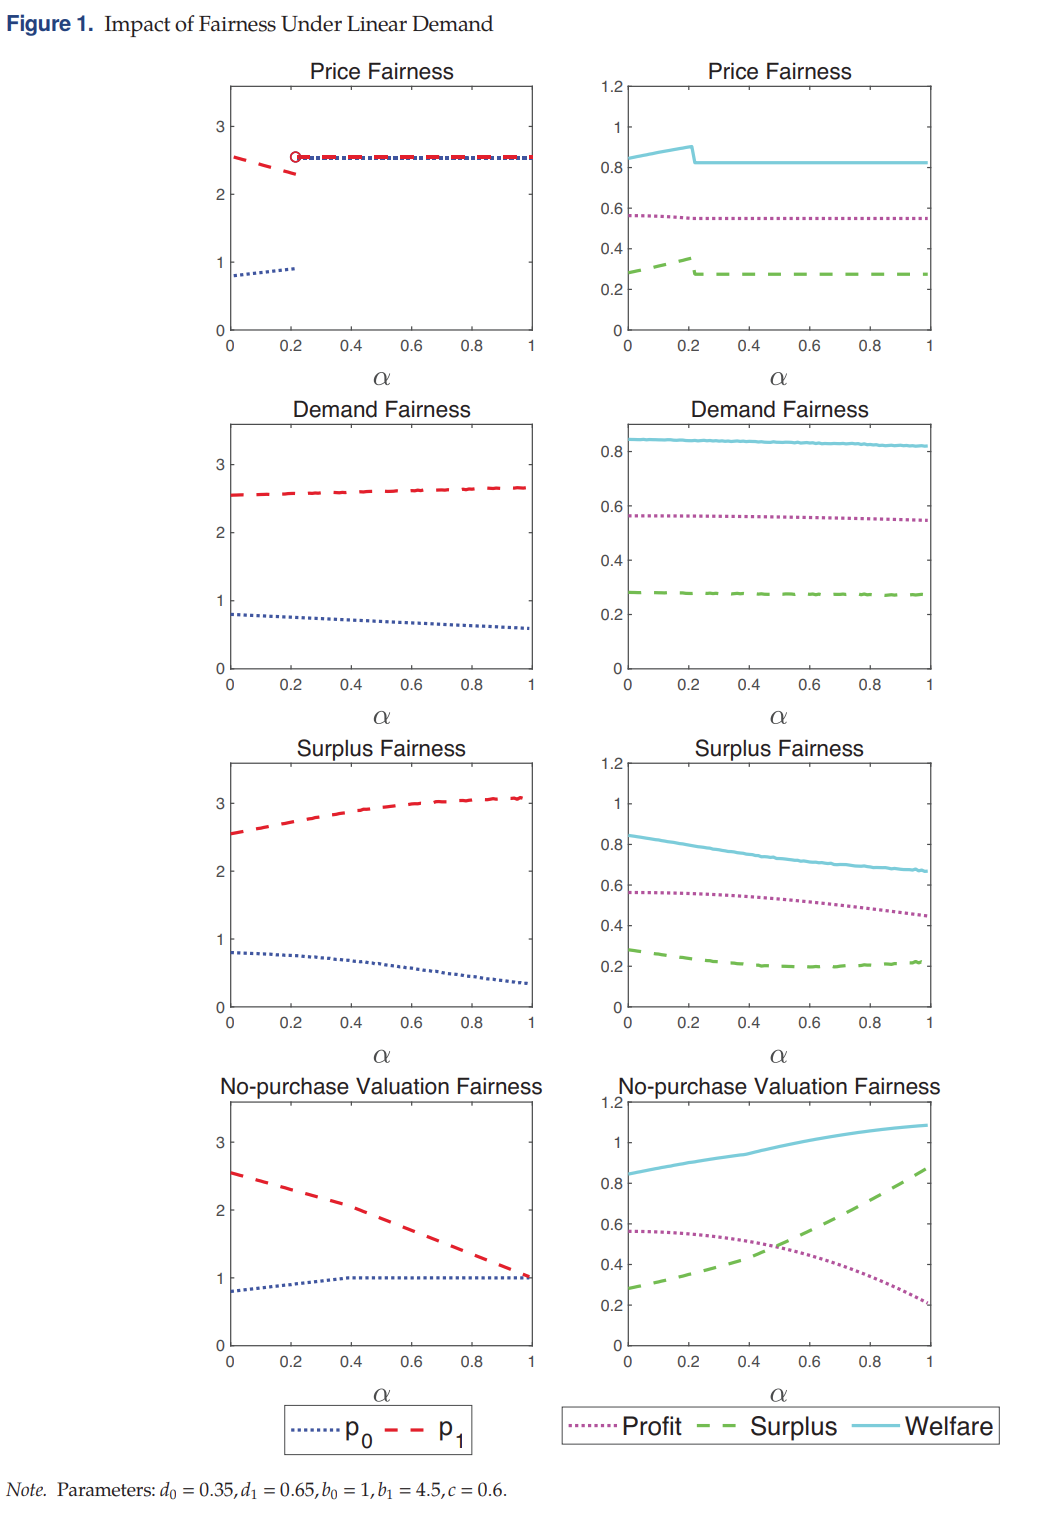

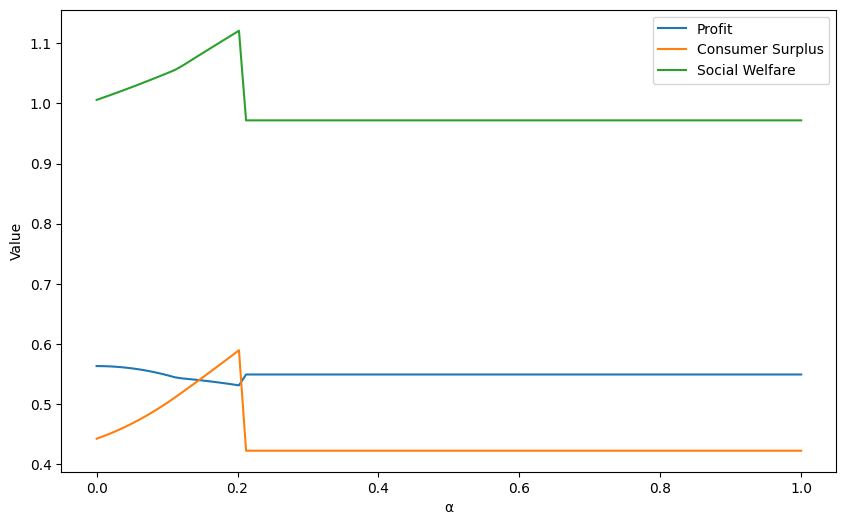

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
d0 = 0.35
d1 = 0.65
b0 = 1
b1 = 4.5
c = 0.6

def alpha_tilde_p(d0, d1, b0, b1, c):
    # See Proposition 2
    return min(np.sqrt((d0 * b1 + d1 * b0) / (d1 * b0)) * (b0 - c) / (b1 - b0), 1)

def price_fairness_analysis(d0, d1, b0, b1, c, num_alpha_steps=100):
    # This is where the results differ slightly from the paper. I'll update when I've confirmed it.
    alpha_values = np.linspace(0, 1, num_alpha_steps)
    p_star_0 = (b0 + c) / 2
    p_star_1 = (b1 + c) / 2
    
    alpha_tilde_p_value = alpha_tilde_p(d0, d1, b0, b1, c)

    profits = []
    consumer_surpluses = []
    social_welfares = []

    for alpha in alpha_values:
        if alpha <= alpha_tilde_p_value:
            p0_alpha = p_star_0 + alpha * (p_star_1 - p_star_0)
            p1_alpha = p_star_1 - alpha * (p_star_1 - p_star_0)
        else:
            p0_alpha = p1_alpha = p_star_1

        F_bar_0 = max(0, 1 - (1 / b0) * p0_alpha)
        F_bar_1 = max(0, 1 - (1 / b1) * p1_alpha)

        R0 = d0 * (p0_alpha - c) * F_bar_0
        R1 = d1 * (p1_alpha - c) * F_bar_1

        S0 = ((b0 - p0_alpha) * F_bar_0) / 2
        S1 = ((b1 - p1_alpha) * F_bar_1) / 2

        total_profit = R0 + R1
        total_consumer_surplus = S0 + S1
        total_social_welfare = total_profit + total_consumer_surplus

        profits.append(total_profit)
        consumer_surpluses.append(total_consumer_surplus)
        social_welfares.append(total_social_welfare)

    return alpha_values, profits, consumer_surpluses, social_welfares



alpha_values, profits, consumer_surpluses, social_welfares = price_fairness_analysis(d0, d1, b0, b1, c)

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, profits, label='Profit')
plt.plot(alpha_values, consumer_surpluses, label='Consumer Surplus')
plt.plot(alpha_values, social_welfares, label='Social Welfare')
plt.xlabel('α')
plt.ylabel('Value')
plt.legend()
plt.show()


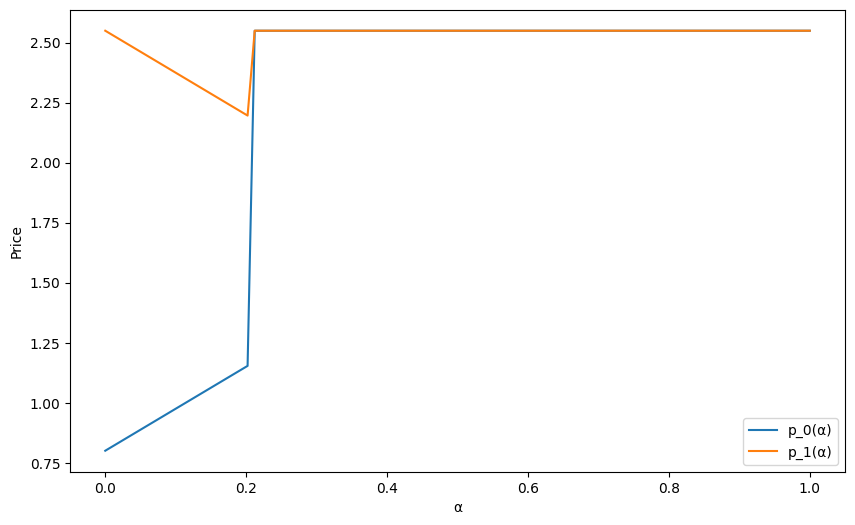

In [2]:
def price_fairness_prices(d0, d1, b0, b1, c, num_alpha_steps=100):
    alpha_values = np.linspace(0, 1, num_alpha_steps)
    p_star_0 = (b0 + c) / 2
    p_star_1 = (b1 + c) / 2
    
    alpha_tilde_p_value = alpha_tilde_p(d0, d1, b0, b1, c)

    p0_values = []
    p1_values = []

    for alpha in alpha_values:
        if alpha <= alpha_tilde_p_value:
            p0_alpha = p_star_0 + alpha * (p_star_1 - p_star_0)
            p1_alpha = p_star_1 - alpha * (p_star_1 - p_star_0)
        else:
            p0_alpha = p1_alpha = p_star_1

        p0_values.append(p0_alpha)
        p1_values.append(p1_alpha)

    return alpha_values, p0_values, p1_values


alpha_values, p0_values, p1_values = price_fairness_prices(d0, d1, b0, b1, c)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, p0_values, label='p_0(α)')
plt.plot(alpha_values, p1_values, label='p_1(α)')
plt.xlabel('α')
plt.ylabel('Price')
plt.legend()
plt.show()